In [5]:
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

In [6]:
# 2. Initialize the Taxi environment
RENDER_RGB = 'rgb_array'
RENDER_ANSI = 'ansi'

GAME_TAXI = 'Taxi-v3'

In [7]:
def create_env(pGame=GAME_TAXI, pRenderMode=RENDER_RGB, pPrint=False):
    if pPrint:
        print('[create_env] Creating environment...')
    try:
        env = gym.make(pGame, render_mode=pRenderMode)
        if pPrint:
            print('[create_env] Environment created successfully!')
        return env
    except Exception as e:
        print('[create_env] Error creating environment:', e)


In [10]:
# 3. Create a function to choose a random action
def get_policy( pState, pEnv=create_env()):
    return pEnv.action_space.sample()  # Random action for demonstration

In [11]:
# 4. Set up parameters
episodes = 1  # Number of episodes to run the agent
max_steps = 20  # Maximum steps per episode

In [13]:
## only used for rgb (graphical) rendering
def display_rgb(pEnv=create_env()):
    if pEnv.render_mode == RENDER_RGB:
        # Capture the frame for rendering
        frame = env.render()
        
        # Display the frame in Jupyter
        plt.imshow(frame)
        plt.axis('off')
        display(plt.gcf())
        clear_output(wait=True)  # Clears the output for each frame
        time.sleep(0.3)  # Adjust for slower or faster playback

In [15]:
# 5. Run the agent in the Taxi environment
def run_episodes(pEnv = create_env(), pEpisodes = episodes, pMaxSteps=max_steps, pPrint=False):
    for episode in range(pEpisodes):
        state, info = pEnv.reset()  # Reset the environment for each episode
        done = False
        step = 0
        
        while not done and step < pMaxSteps:
            
            if pEnv.render_mode == RENDER_RGB:
                display_rgb()
            else:
                print(pEnv.render())
            
            # Choose an action using the function
            action = get_policy(pState=state, pEnv=env)
            
            # Apply the action to the environment
            next_state, reward, terminated, truncated, info = pEnv.step(action)

                       
                     
            # Update state and check termination
            state = next_state

            if pPrint:
                print('---------------')
                print(f'current step: {step}')
                print(f'current state: {state}')                
                print(f'action: {action}')
                print(f'next_state: {next_state}')
                print(f'info: {info}')
            done = terminated or truncated
            step += 1
    
        print(f"Episode {episode + 1} finished in {step} steps.\n")
    
    # 6. Close the environment when done
    pEnv.close()

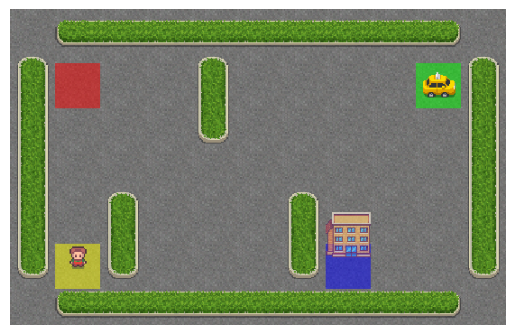

In [ ]:
## RGB
env = create_env(pRenderMode = RENDER_RGB,  pPrint=True)
run_episodes(pEnv=env, pEpisodes=1, pMaxSteps=10)

In [ ]:
## text
env = create_env(pRenderMode = RENDER_ANSI,  pPrint=True)
run_episodes(pEnv=env, pEpisodes=1, pMaxSteps=5, pPrint=True)